# **IN-VEHICLE COUPON RECOMMENDATION**

---





*  NAME: GAYATHRI GIRISH
*  ORGANISATION: ENTRI ELEVATE
*  DATE:

---






**1.OVERVIEW OF THE PROBLEM:**

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and asks the person whether they will accept the coupon if they are the driver. The objective is to develop an effective prediction model to determine whether a driver will accept a coupon based on the provided scenario.

**2.OBJECTIVE:**

To develop the best prediction model for determining the likelihood of coupon acceptance using machine learning techniques.

**3.DATA DESCRIPTION:**

* ***Source***: UCI Repository
* ***Features***:
destination, passanger, weather, temperature, time,coupon, expiration, gender, age, maritalStatus, has_Children, education, occupation, income, Car,Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y



In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

**4.DATA COLLECTION**

In [267]:
df = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [269]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [270]:
df.info, df.head

(<bound method DataFrame.info of            destination  passanger weather  temperature  time  \
 0      No Urgent Place      Alone   Sunny           55   2PM   
 1      No Urgent Place  Friend(s)   Sunny           80  10AM   
 2      No Urgent Place  Friend(s)   Sunny           80  10AM   
 3      No Urgent Place  Friend(s)   Sunny           80   2PM   
 4      No Urgent Place  Friend(s)   Sunny           80   2PM   
 ...                ...        ...     ...          ...   ...   
 12679             Home    Partner   Rainy           55   6PM   
 12680             Work      Alone   Rainy           55   7AM   
 12681             Work      Alone   Snowy           30   7AM   
 12682             Work      Alone   Snowy           30   7AM   
 12683             Work      Alone   Sunny           80   7AM   
 
                       coupon expiration  gender age      maritalStatus  ...  \
 0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
 1               Coffee Ho

In [271]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

In [272]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (missing_values / len(df)) * 100

In [273]:
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_values_percentage
}).sort_values(by='Percentage Missing', ascending=False)

In [274]:
# Summary statistics
missing_summary, df.describe()

(                      Missing Values  Percentage Missing
 car                            12576           99.148534
 CoffeeHouse                      217            1.710817
 Restaurant20To50                 189            1.490066
 CarryAway                        151            1.190476
 RestaurantLessThan20             130            1.024913
 Bar                              107            0.843582
 destination                        0            0.000000
 passanger                          0            0.000000
 direction_opp                      0            0.000000
 direction_same                     0            0.000000
 toCoupon_GEQ25min                  0            0.000000
 toCoupon_GEQ15min                  0            0.000000
 toCoupon_GEQ5min                   0            0.000000
 income                             0            0.000000
 occupation                         0            0.000000
 education                          0            0.000000
 has_children 

**5.DATA PREPROCESSING**

*i.handle missing values*

In [275]:
# Drop the 'car' column due to excessive missing values
df_cleaned = df.drop(columns=['car'])

In [276]:
# Impute missing values for categorical columns using the mode
categorical_columns_with_missing = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in categorical_columns_with_missing:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

In [277]:
# Verify that all missing values have been handled
missing_values_after_cleaning = df_cleaned.isnull().sum()

In [278]:
# Summary of numerical data to check for potential outliers and skewness
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = df_cleaned[numerical_columns].describe()

In [279]:
missing_values_after_cleaning, numerical_summary

(destination             0
 passanger               0
 weather                 0
 temperature             0
 time                    0
 coupon                  0
 expiration              0
 gender                  0
 age                     0
 maritalStatus           0
 has_children            0
 education               0
 occupation              0
 income                  0
 Bar                     0
 CoffeeHouse             0
 CarryAway               0
 RestaurantLessThan20    0
 Restaurant20To50        0
 toCoupon_GEQ5min        0
 toCoupon_GEQ15min       0
 toCoupon_GEQ25min       0
 direction_same          0
 direction_opp           0
 Y                       0
 dtype: int64,
         temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
 count  12684.000000  12684.000000           12684.0       12684.000000   
 mean      63.301798      0.414144               1.0           0.561495   
 std       19.154486      0.492593               0.0           0.496224   
 min      

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

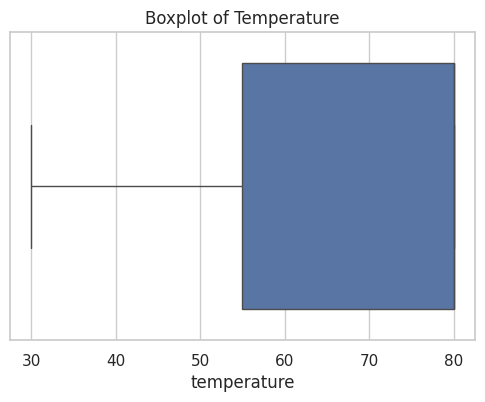

In [281]:
# Outlier detection for 'temperature' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['temperature'])
plt.title('Boxplot of Temperature')
plt.show()

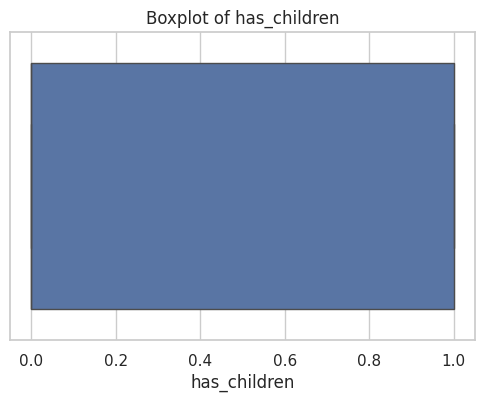

In [282]:
# Outlier detection for 'has_children' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['has_children'])
plt.title('Boxplot of has_children')
plt.show()

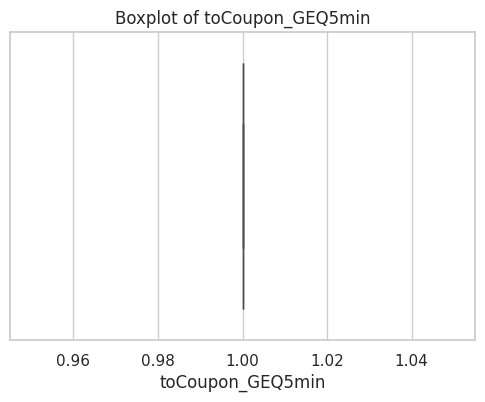

In [283]:
# Outlier detection for 'toCoupon_GEQ5min' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['toCoupon_GEQ5min'])
plt.title('Boxplot of toCoupon_GEQ5min')
plt.show()

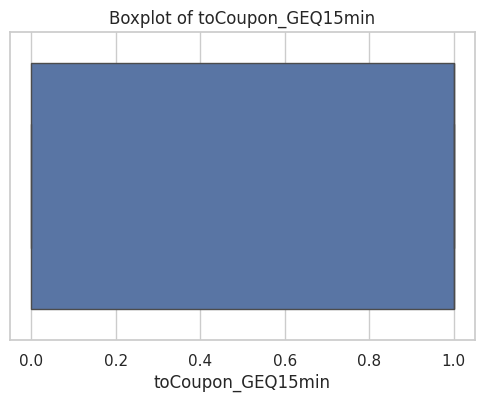

In [284]:
# Outlier detection for 'toCoupon_GEQ15min' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['toCoupon_GEQ15min'])
plt.title('Boxplot of toCoupon_GEQ15min')
plt.show()

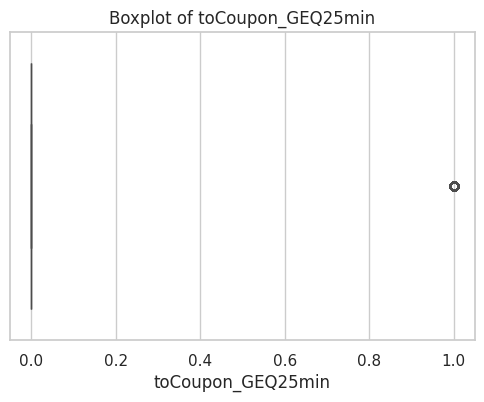

In [285]:
# Outlier detection for 'toCoupon_GEQ25min' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['toCoupon_GEQ25min'])
plt.title('Boxplot of toCoupon_GEQ25min')
plt.show()

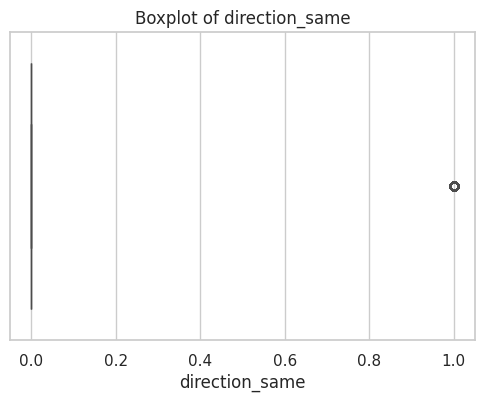

In [286]:
# Outlier detection for 'direction_same' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['direction_same'])
plt.title('Boxplot of direction_same')
plt.show()

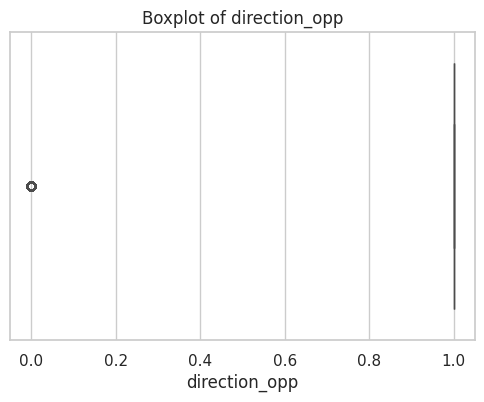

In [287]:
# Outlier detection for 'direction_opp' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['direction_opp'])
plt.title('Boxplot of direction_opp')
plt.show()

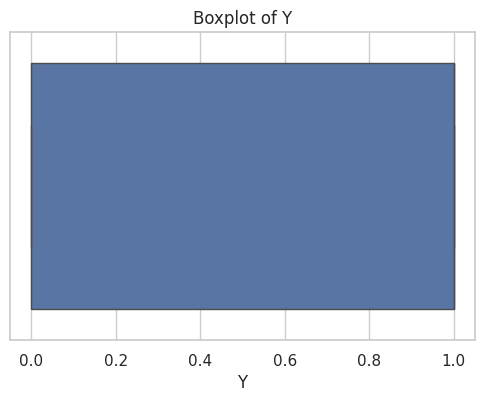

In [288]:
# Outlier detection for 'Y' using boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['Y'])
plt.title('Boxplot of Y')
plt.show()

In [289]:
# Save cleaning results
print("Data Cleaning Completed!")

Data Cleaning Completed!


**6.EXPLORATORY DATA ANALYSIS(EDA)**

In [290]:
# Import libraries for visualization
import seaborn as sns
sns.set_theme(style="whitegrid")

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>],
       [<Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

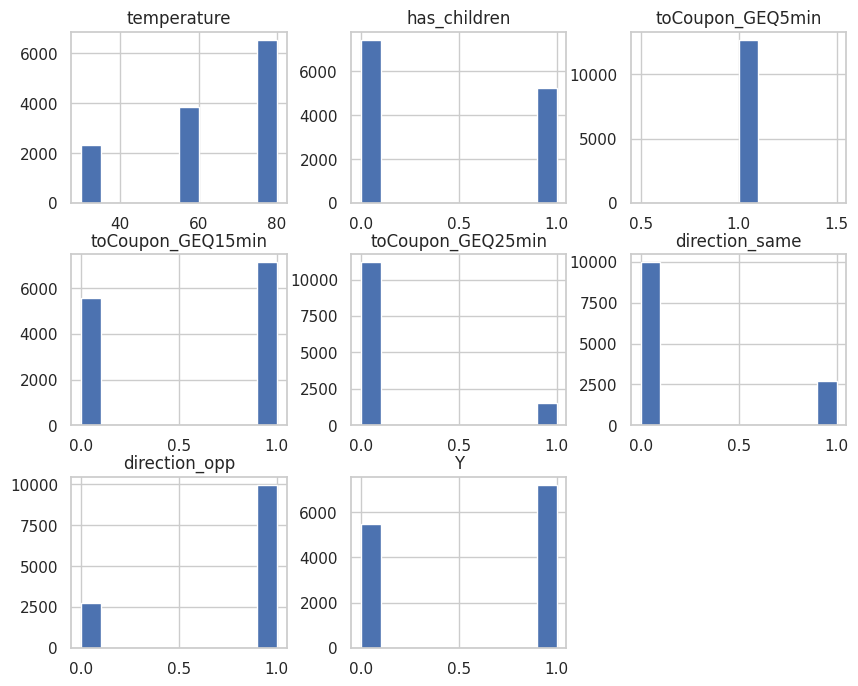

In [291]:
df.hist(figsize=(10,8))

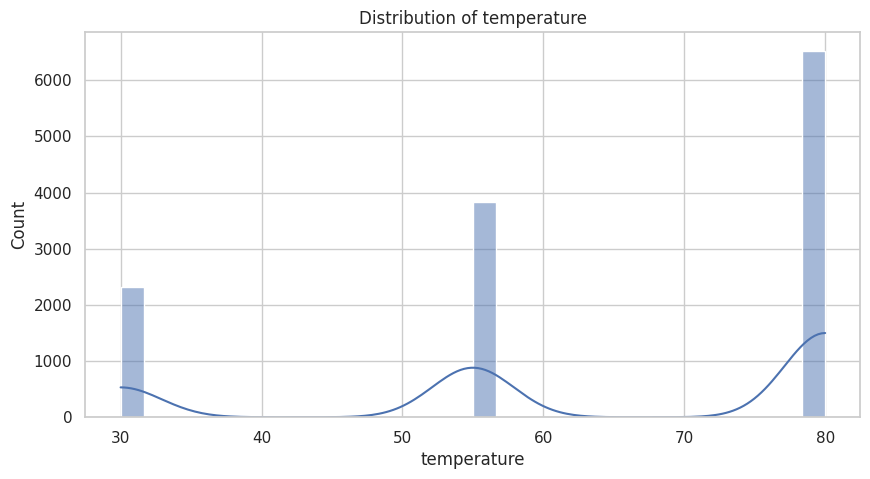

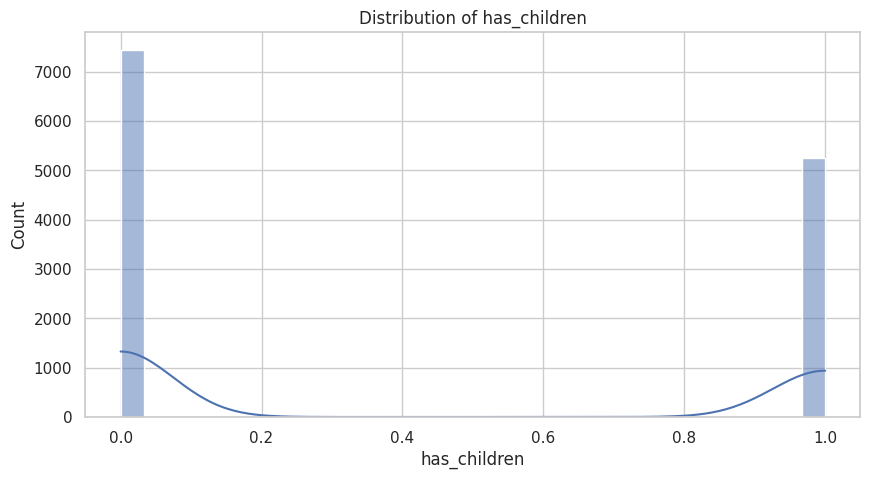

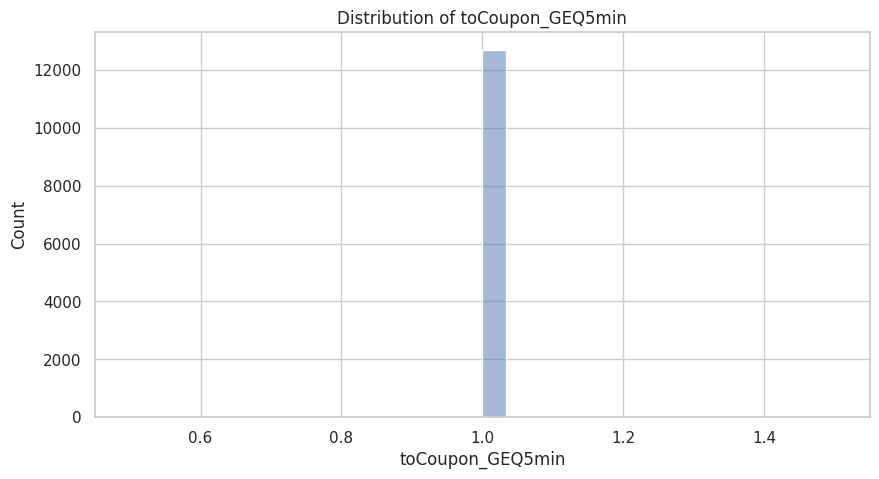

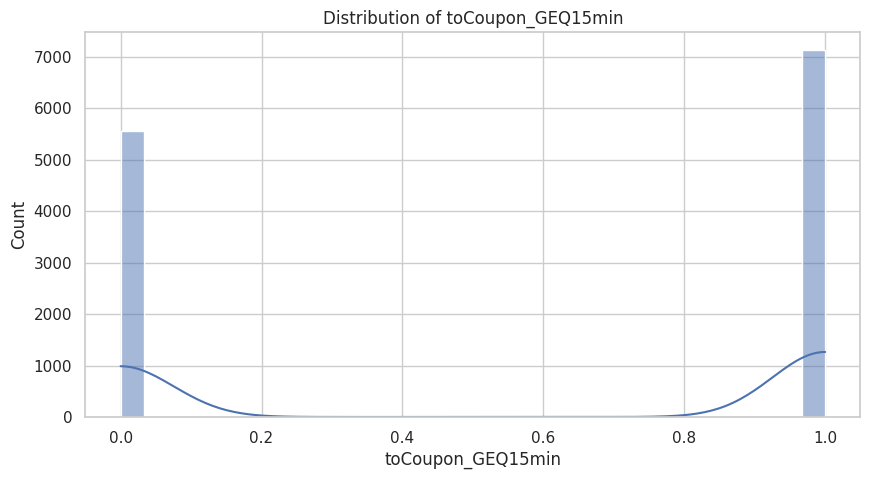

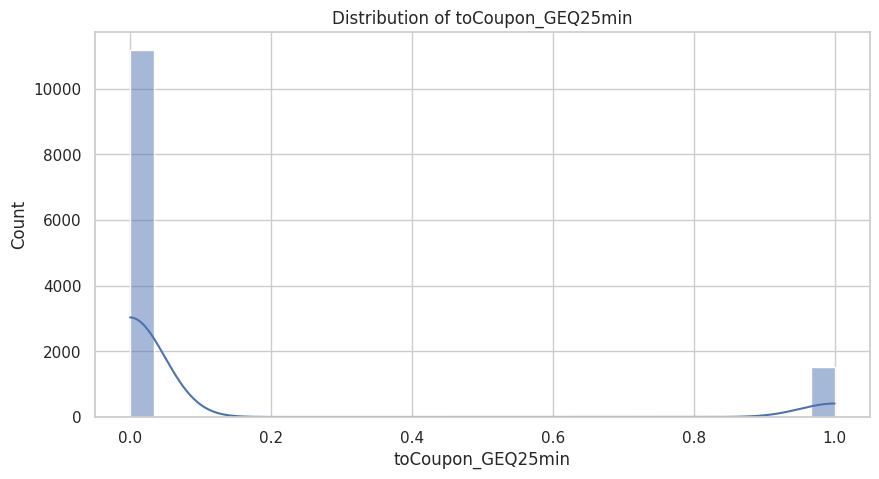

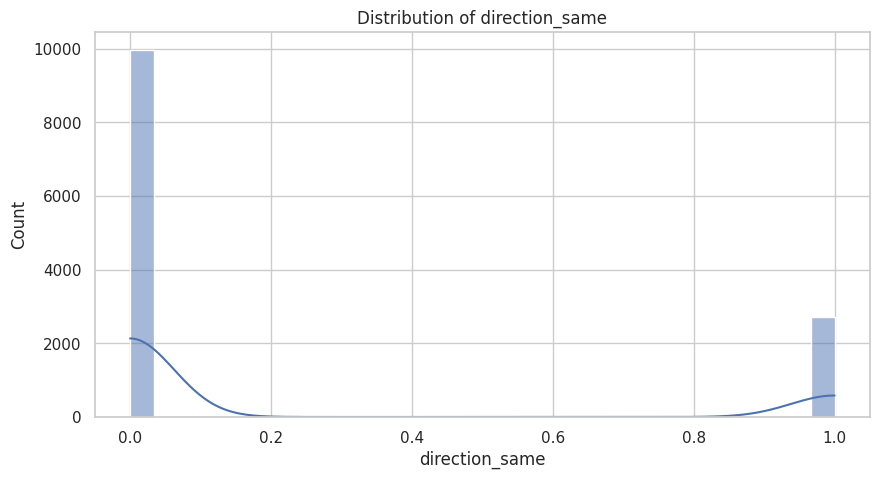

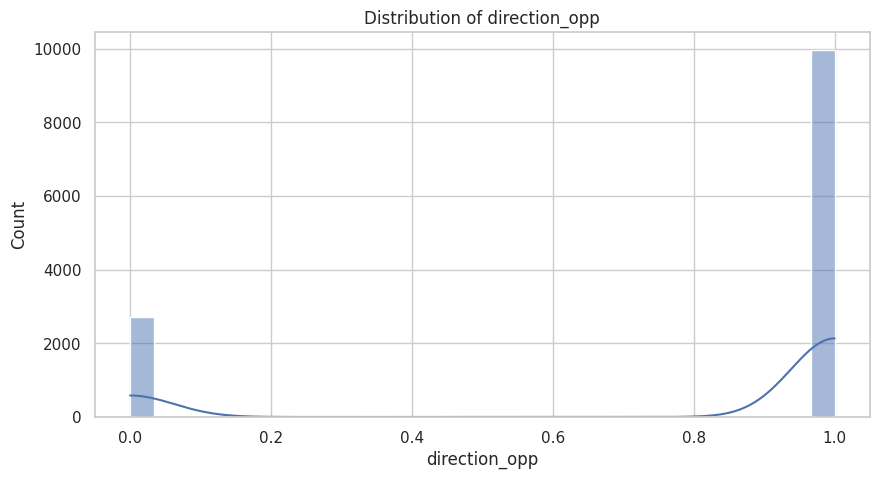

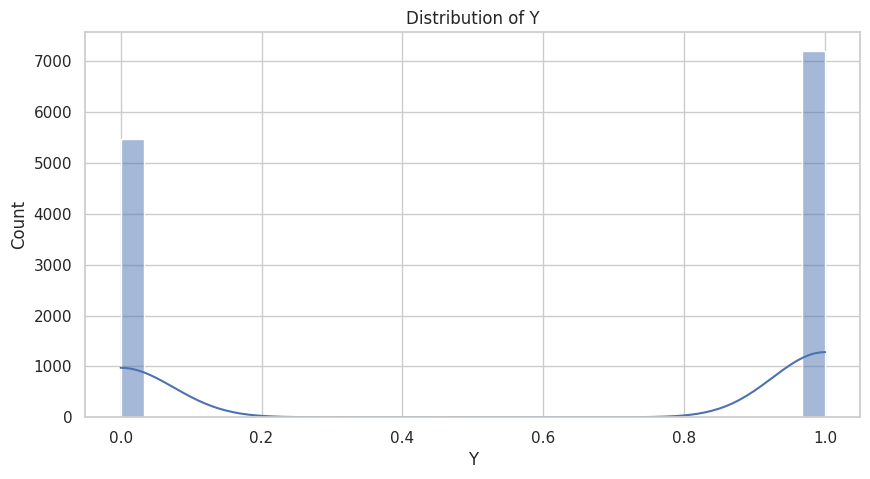

In [292]:
# Histograms and KDE plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

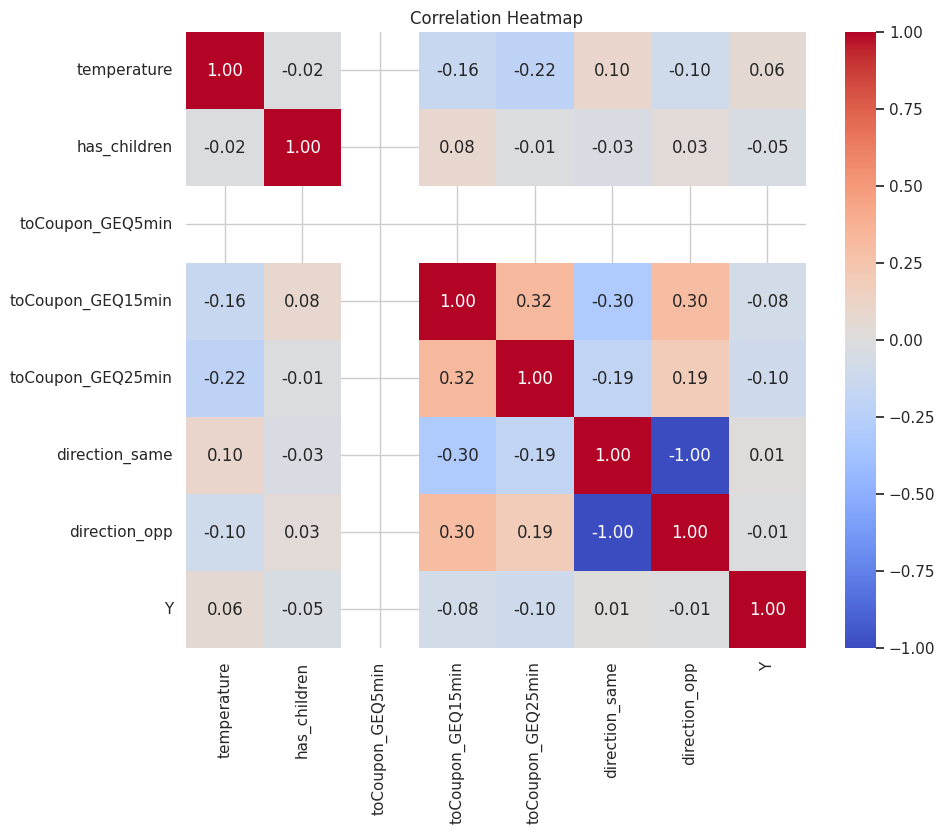

In [293]:
#  Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

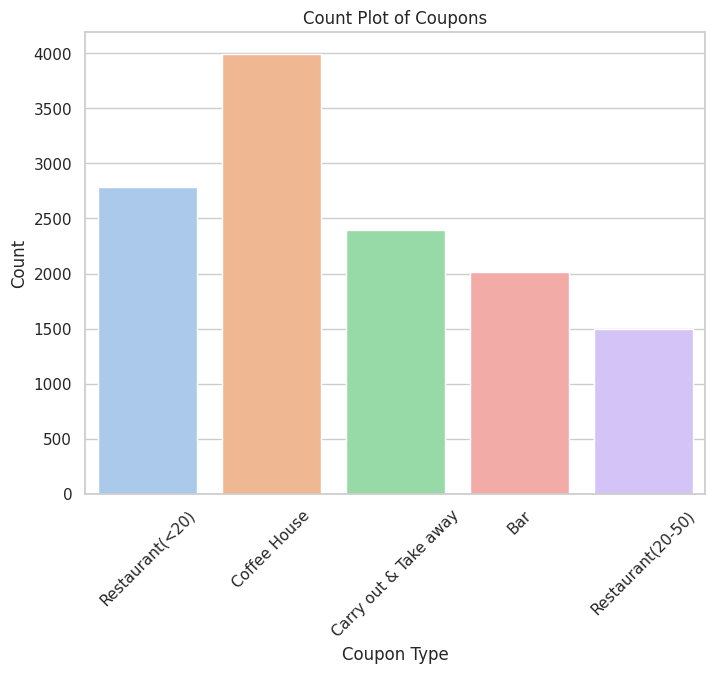

In [294]:
#  Count Plot for categorical variable 'coupon'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='coupon', palette='pastel')
plt.title('Count Plot of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

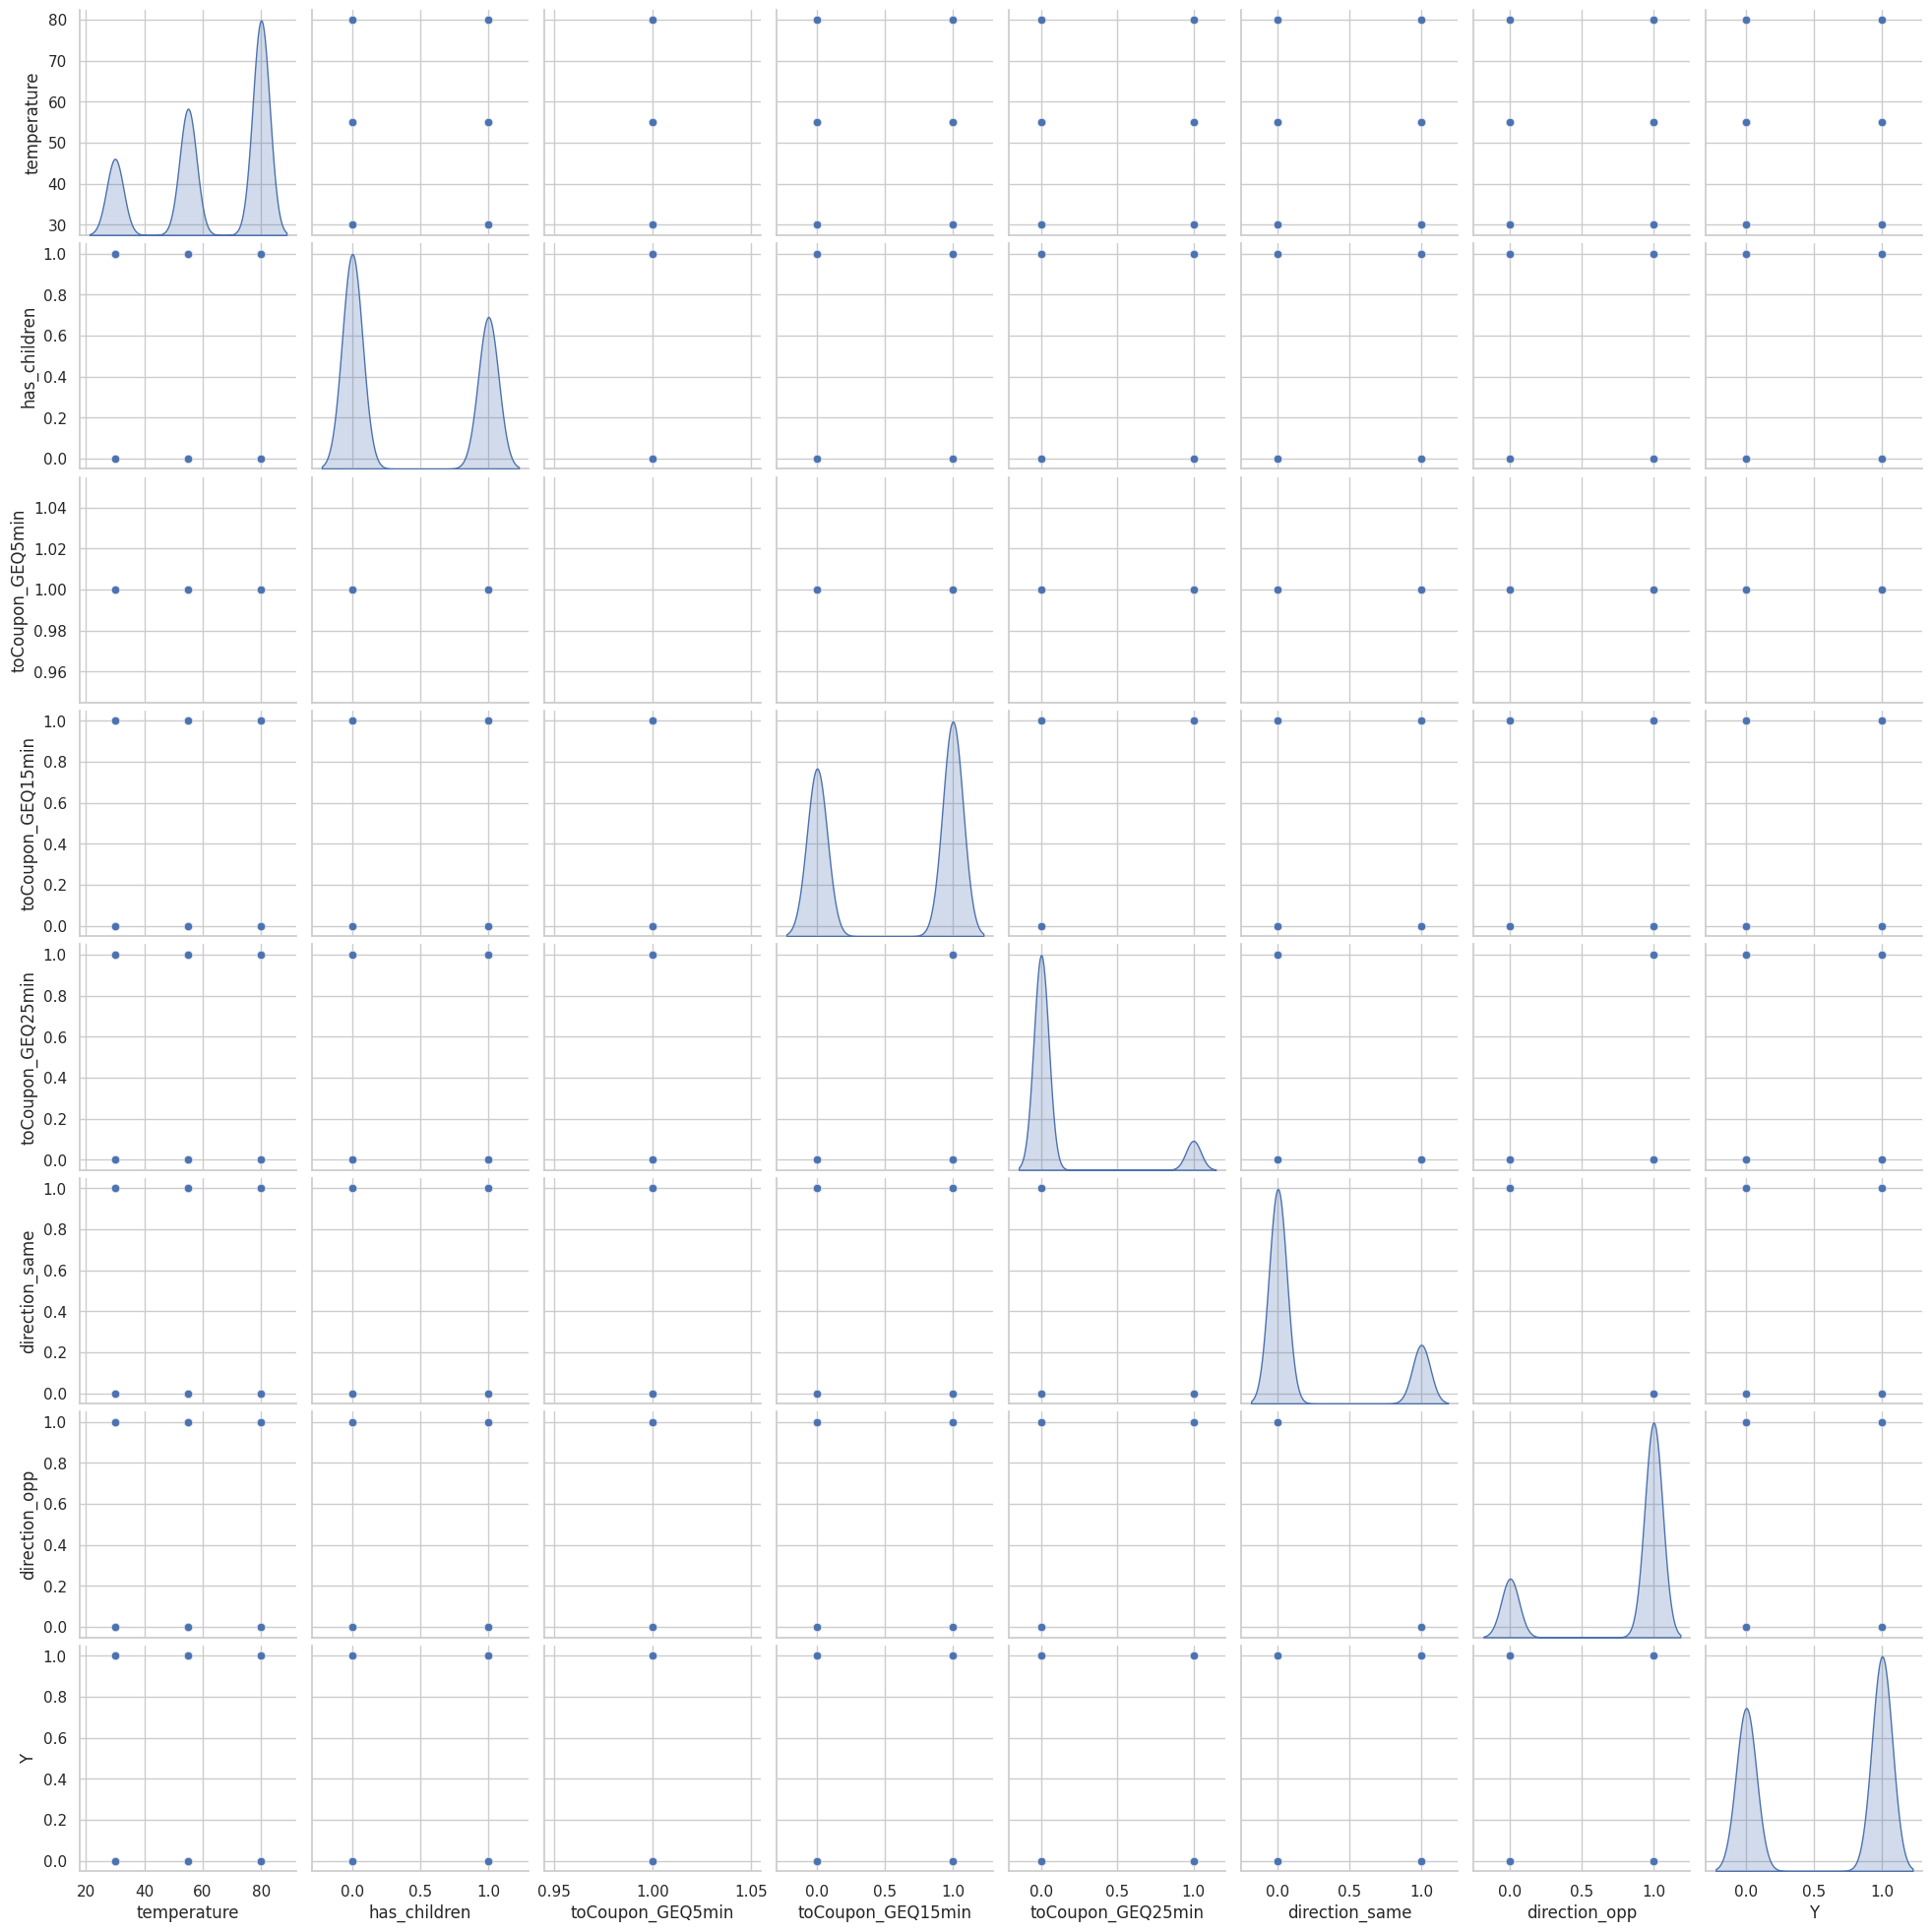

In [295]:
#  Pair Plot for numerical relationships
sns.pairplot(df_cleaned[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

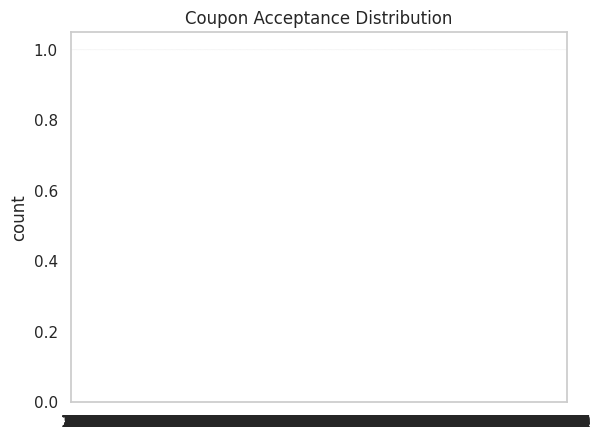

In [296]:
# Check class distribution
sns.countplot(df['Y'])
plt.title('Coupon Acceptance Distribution')
plt.show()

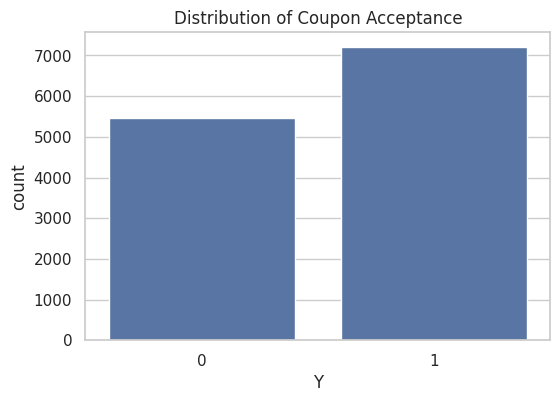

In [297]:
# Distribution of Y (Coupon Acceptance)
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title("Distribution of Coupon Acceptance")
plt.show()


**7.FEATURE ENGINEERING**

In [298]:
# Identify categorical columns in the dataset
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

In [299]:
# Display the identified categorical columns
categorical_columns.tolist()

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [300]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [301]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [302]:
one_hot_encoded_data = pd.get_dummies(df, columns=['destination','passanger','time','coupon','expiration','gender', 'weather','age','maritalStatus','education','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'], drop_first=True)

In [303]:
print(one_hot_encoded_data.head())

   temperature  has_children  car  toCoupon_GEQ5min  toCoupon_GEQ15min  \
0           55             1  NaN                 1                  0   
1           80             1  NaN                 1                  0   
2           80             1  NaN                 1                  1   
3           80             1  NaN                 1                  1   
4           80             1  NaN                 1                  1   

   toCoupon_GEQ25min  direction_same  direction_opp  Y  \
0                  0               0              1  1   
1                  0               0              1  0   
2                  0               0              1  1   
3                  0               0              1  0   
4                  0               0              1  0   

   destination_No Urgent Place  ...  CarryAway_less1  CarryAway_never  \
0                         True  ...            False            False   
1                         True  ...            False        

In [304]:
print("Categorical Variables Encoded!")

Categorical Variables Encoded!


**8.FEATURE SELECTION**

*RANDOM FOREST CLASSIFIER*

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
# Separate features and target variable
X = df.drop(columns=['Y'])  # Replace 'Y' with your target column
y = df['Y']


In [307]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

In [308]:
# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y)
feature_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

In [309]:
print("Top Features by Random Forest:\n", feature_importances.head(10))

Top Features by Random Forest:
 expiration_2h                   0.034136
coupon_Carry out & Take away    0.032343
temperature                     0.030568
coupon_Restaurant(<20)          0.030184
coupon_Coffee House             0.028346
CoffeeHouse_never               0.024612
toCoupon_GEQ15min               0.024421
time_6PM                        0.020146
Restaurant20To50_less1          0.019090
gender_Male                     0.018673
dtype: float64


In [310]:
# Get feature importances
importances = rf.feature_importances_

In [311]:
# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,  # Use X_encoded.columns instead of X.columns
    'Importance': importances
})

In [312]:
# Sort the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [313]:
# Display feature importance
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                         Feature  Importance
22                 expiration_2h    0.034136
18  coupon_Carry out & Take away    0.032343
0                    temperature    0.030568
21        coupon_Restaurant(<20)    0.030184
19           coupon_Coffee House    0.028346
..                           ...         ...
74                 car_crossover    0.000486
72                    car_Mazda5    0.000397
73    car_Scooter and motorcycle    0.000382
75              car_do not drive    0.000375
2               toCoupon_GEQ5min    0.000000

[96 rows x 2 columns]


In [314]:
# Set a threshold for removing features
threshold = 0.05
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

In [315]:
# Filter the dataset to include only the important features
X_selected = X[important_features]

In [316]:
# Display the selected features
print("\nSelected Features after Removing Irrelevant/Redundant Features:")
print(X_selected)


Selected Features after Removing Irrelevant/Redundant Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[12684 rows x 0 columns]


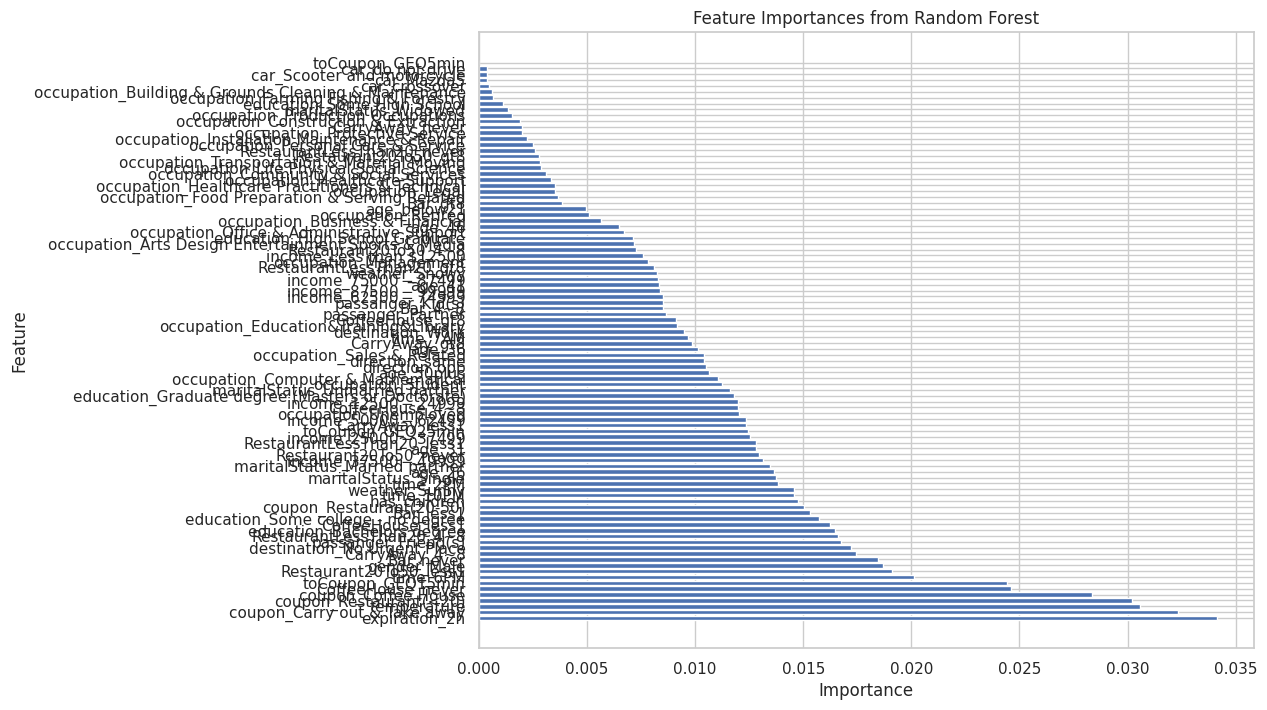

In [317]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

**9.SPLIT DATA INTO TRAINING AND TESTING SETS**

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [320]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (10147, 96)
Testing Set Shape: (2537, 96)


**10.FEATURE SCALING**

In [321]:
from sklearn.preprocessing import MinMaxScaler

In [322]:
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [323]:
print("Scaled Training Data:\n", X_train_scaled[:5])


Scaled Training Data:
 [[0.5 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0

**11.MODEL BUILDING**

*1. Logistic Regression*

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [325]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [326]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

In [327]:
# Make predictions
y_pred = model.predict(X_test_scaled)

**12.MODEL EVALUATION**

In [328]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

In [329]:
import matplotlib.pyplot as plt

*Logistic Regression*

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [332]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

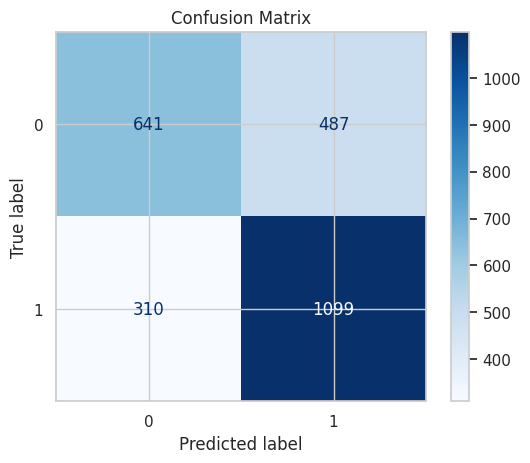

In [333]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [334]:
# 2. Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62      1128
           1       0.69      0.78      0.73      1409

    accuracy                           0.69      2537
   macro avg       0.68      0.67      0.68      2537
weighted avg       0.68      0.69      0.68      2537



In [335]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

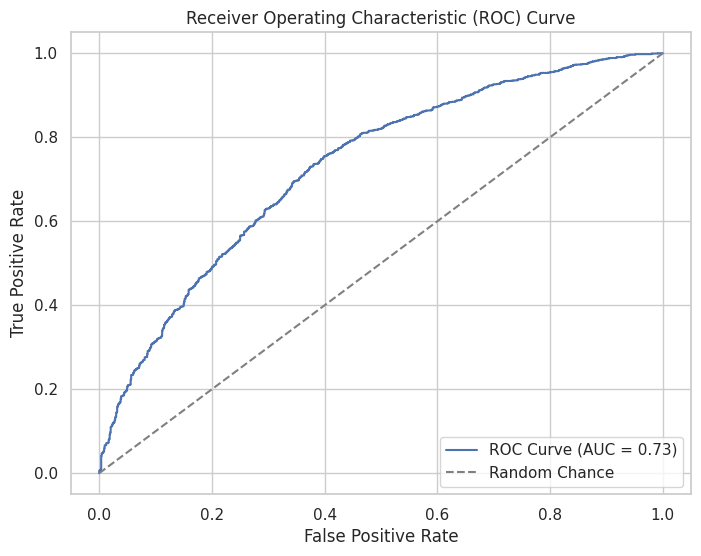

In [336]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

* **SVM**

In [337]:
model = SVC(probability=True)
model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [338]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

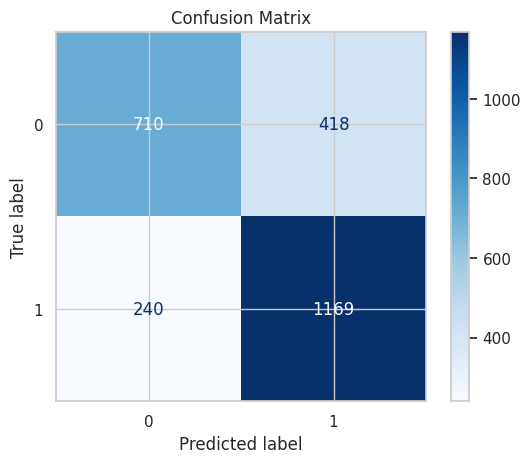

In [339]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [340]:
# 2. Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.68      1128
           1       0.74      0.83      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



In [341]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

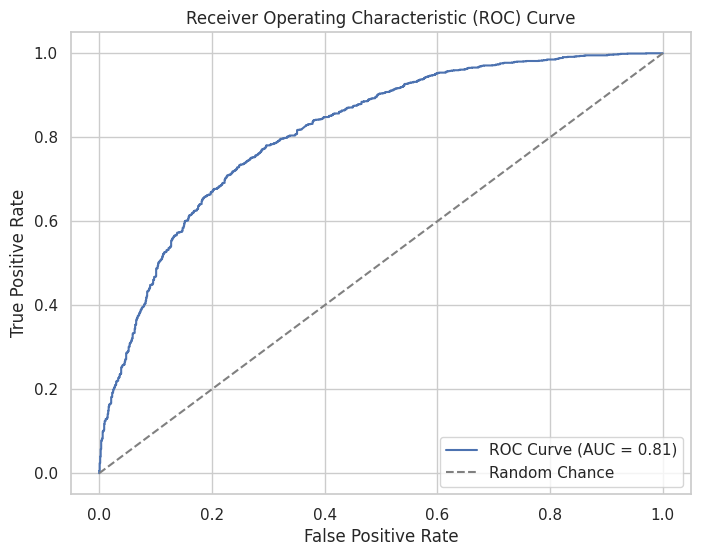

In [342]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*Decision Tree*

In [343]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [344]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

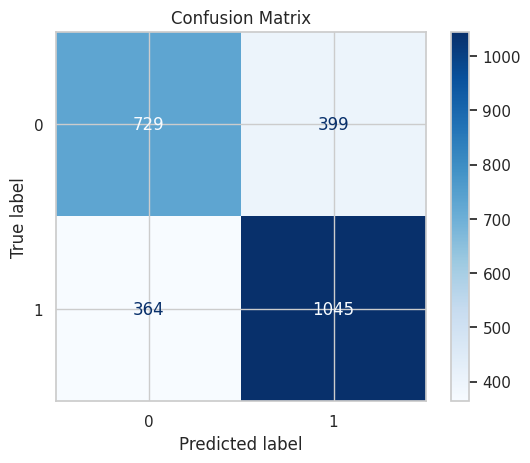

In [345]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [346]:
# 2. Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66      1128
           1       0.72      0.74      0.73      1409

    accuracy                           0.70      2537
   macro avg       0.70      0.69      0.69      2537
weighted avg       0.70      0.70      0.70      2537



In [347]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)


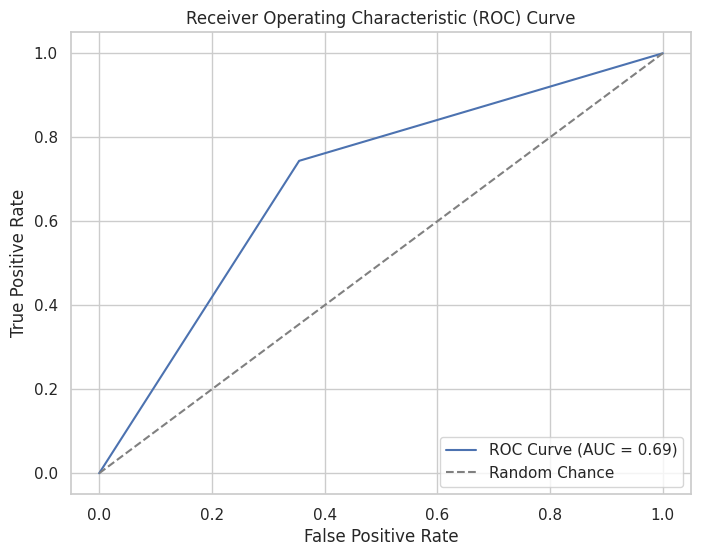

In [348]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*Random Forest*

In [349]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [350]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

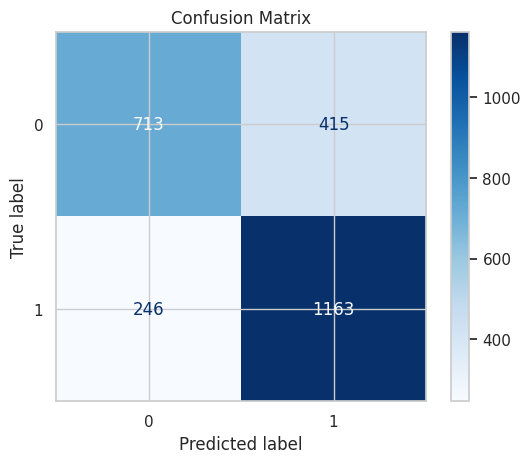

In [351]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [352]:
# 2. Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1128
           1       0.74      0.83      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



In [353]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

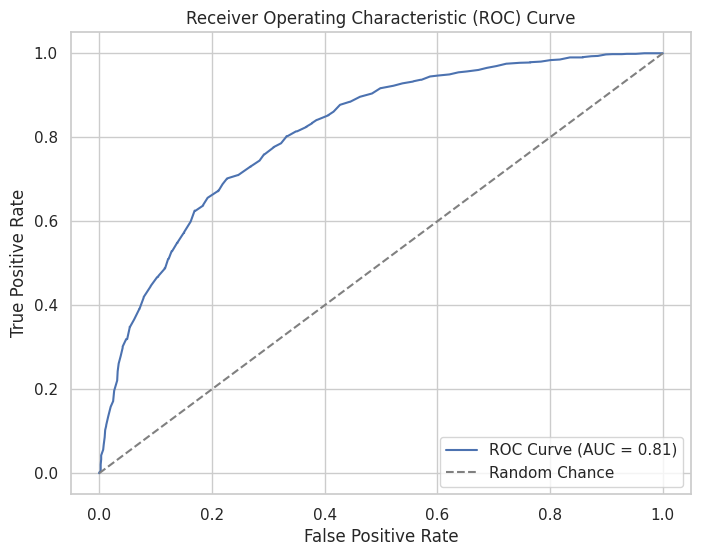

In [354]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*K-Nearest Neighbors*

In [355]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [356]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

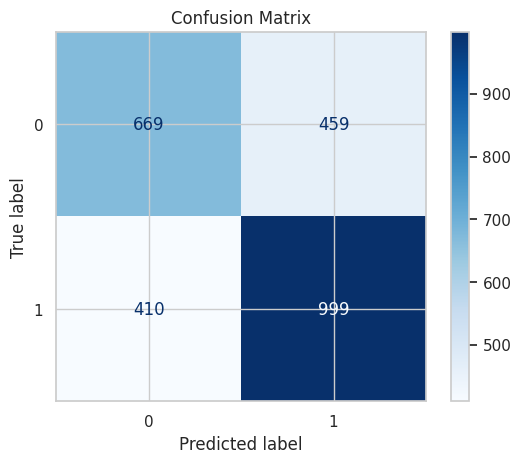

In [357]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [358]:
# 2. Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61      1128
           1       0.69      0.71      0.70      1409

    accuracy                           0.66      2537
   macro avg       0.65      0.65      0.65      2537
weighted avg       0.66      0.66      0.66      2537



In [359]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

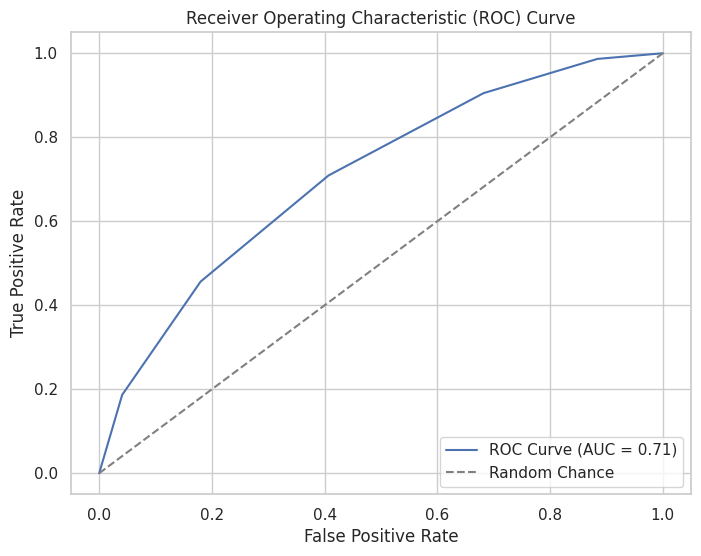

In [360]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

*Gradient booster*

In [361]:
model = GradientBoostingClassifier()
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [362]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

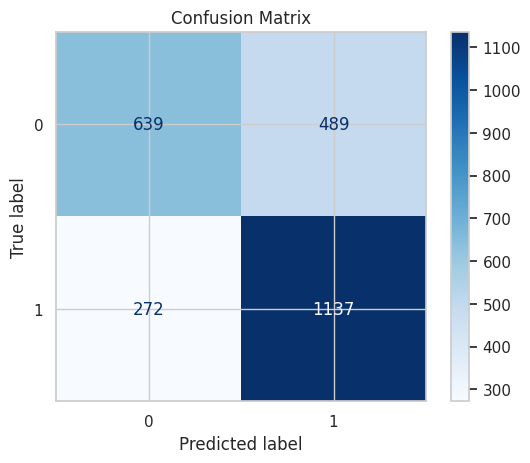

In [363]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [364]:
# 2. Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63      1128
           1       0.70      0.81      0.75      1409

    accuracy                           0.70      2537
   macro avg       0.70      0.69      0.69      2537
weighted avg       0.70      0.70      0.69      2537



In [365]:
# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

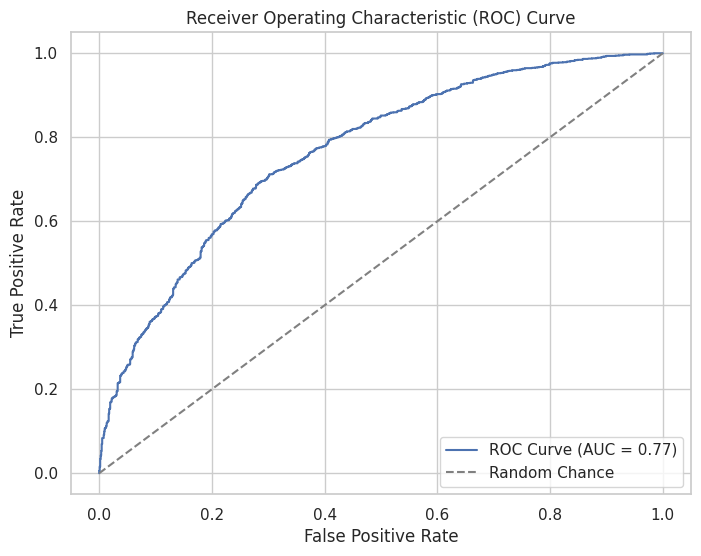

In [366]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**BEST MODEL**

In [367]:
# Initialize a dictionary to store metrics for each model
evaluation_results = {}

In [368]:
# Loop through each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

In [369]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [370]:
# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
f1_score = report['weighted avg']['f1-score']
auc = roc_auc_score(y_test, y_proba)

In [371]:
# Store results
evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1_score,
        "AUC": auc,
}

In [372]:
# Convert results into a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(evaluation_results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [373]:
print("Evaluation Results:\n", results_df)

Evaluation Results:
                    Accuracy  F1-Score       AUC
Gradient Boosting  0.700039  0.694801  0.765377


In [374]:
# Highlight the best model based on Accuracy (or other metrics)
best_model_name = results_df.idxmax()["Accuracy"]
best_model_metrics = results_df.loc[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Performance Metrics:\n{best_model_metrics}")


Best Model: Gradient Boosting
Performance Metrics:
Accuracy    0.700039
F1-Score    0.694801
AUC         0.765377
Name: Gradient Boosting, dtype: float64


**13.HYPERPARAMETER TUNING**

In [375]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [382]:
# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

In [383]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

In [385]:
from sklearn.model_selection import RandomizedSearchCV
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)


In [386]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [387]:
# Best parameters and best model
best_params = random_search.best_params_
best_gb_model = random_search.best_estimator_

In [388]:
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.2}


**14.SAVE THE MODEL**

In [389]:
# Save the best model
import joblib
joblib.dump(best_gb_model, 'in-vehicle_coupon_recommendation_model.pkl')
print("Model saved as'in-vehicle_coupon_recommendation_model.pkl'")

Model saved as'in-vehicle_coupon_recommendation_model.pkl'


In [ ]:
# Save the best model
joblib.dump(best_gb_model, 'gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")

In [391]:
from sklearn.pipeline import Pipeline
# Define the pipeline
pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),  # Scaling step
    ('model', best_gb_model)    # Tuned Gradient Boosting model
])

In [392]:
# Fit the pipeline to the training data
pipeline.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=7,
                                            max_features='sqrt',
                                            min_samples_leaf=6,
                                            min_samples_split=5,
                                            n_estimators=200,
                                            random_state=42))])

In [393]:
# Save the pipeline
pipeline_filename = 'in-vehicle_coupon_recommendation_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)
print(f"Pipeline saved as '{pipeline_filename}'")

Pipeline saved as 'in-vehicle_coupon_recommendation_pipeline.pkl'


**15.TEST WITH UNSEEN DATA**

In [395]:
# Load the pipeline
pipeline_filename = 'in-vehicle_coupon_recommendation_pipeline.pkl'
loaded_pipeline = joblib.load(pipeline_filename)

In [397]:
#Creating a data with random numbers with same columns with 10 rows
unseen_data = np.random.rand(10, X_test.shape[1])

In [398]:
# Predictions
unseen_predictions = loaded_pipeline.predict(unseen_data)

In [399]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

In [402]:
unseen_labels = np.random.randint(0, 2, size=10)  # Mock true labels for testing
accuracy = accuracy_score(unseen_labels, unseen_predictions)

In [405]:
accuracy = accuracy_score(unseen_labels, unseen_predictions)
print("Accuracy on Unseen Data:", accuracy)
print("Predictions on unseen data:", unseen_predictions)
print("\nClassification Report:\n", classification_report(unseen_labels, unseen_predictions))

Accuracy on Unseen Data: 0.7
Predictions on unseen data: [0 1 1 1 0 0 0 0 0 0]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

